## This notebook will be a self-teaching materials that I learned in DFO methods 

1. Bayesian Optmization Algorithm:

    this algorithm uses probabilities as direct search
    
    I want to use algorithms to get three components in bayesian formula:
    
    - posterior = likelihood * prior
    - P(f|D) = P(D|f) * P(f)
    
   posterior probability is a surrogate objective function
    
   one way to understand this step of bayesian optimization as estimating the objective function with a surrogate function

    1.1 Optimization process involves:
    
    - selecting samples from acquisition function 
    
    - evaluate samples with objective function 
    
    - update the data and get surrogate function 
    
    - repeat the loop until result is good enough
    
 


In [16]:
from math import sin
from math import pi
import numpy as np
from numpy import arange
from numpy import argmax
from numpy.random import normal
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.stats import norm
from warnings import catch_warnings
from warnings import simplefilter

In [23]:
# practice while learning
# prepare a test case

# objective function. simulated data by x**2 * sin(5 * pi * x)**6.0 + gaussian noise 
def objective(x, noise=0.1):
    noise = normal(loc=0, scale=noise)
    return (x**2 * sin(5 * pi * x)**6.0) + noise

# grid-based sample of the domain [0,1]
X = np.arange(0, 1, 0.01)
# sample the domain without noise
y = [objective(x, 0) for x in X]
# sample the domain with noise
ynoise = [objective(x) for x in X]

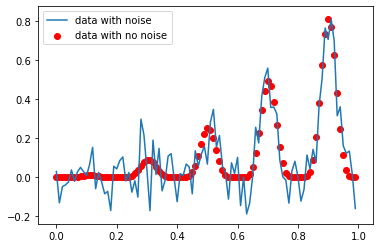

In [24]:
plt.scatter(X,y,c = "r",label = "data with no noise")
plt.plot(X,ynoise, label = "data with noise")
plt.legend()
plt.show()

In [25]:
print('Optima: x=%.3f, y=%.3f' % (X[argmax(y)], y[argmax(y)]))

Optima: x=0.900, y=0.810


In [26]:
## surrogate function
### apply gaussian process model 

gb_model = GaussianProcessRegressor()
X_train = np.array(X).reshape(-1, 1)
y_train = np.array(ynoise).reshape(-1, 1)
gb_model.fit(X_train,y_train)

GaussianProcessRegressor()

In [27]:
yhat = gb_model.predict(X_train, return_std=True)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:370: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [28]:
# Surrogate function 
# We can call this function any time to estimate the cost of one or more samples 
# such as when we want to optimize the acquisition function in the next section.
def surrogate(model,sample):
    return model.predict(sample,return_std=True)

In [31]:
# plot real observations v.s surrogate function
def compare_plot(X,y,model):
    plt.scatter(X,y,c = "r",label = "real observation with noise")
    # surrogate samples
    s_sample = np.arange(0, 1, 0.001)
    s_sample = np.array(s_sample).reshape(-1, 1)
    s_pre, _ = surrogate(model,s_sample)
    plt.plot(s_sample,s_pre, label = "surrogate function prediction")
    plt.legend()
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:370: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


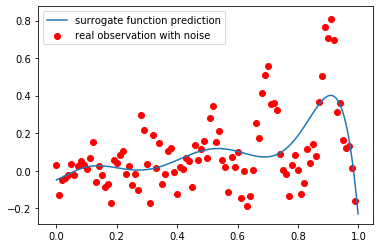

In [32]:
compare_plot(X,ynoise,gb_model)

# Acquisition functions
There are many different types of probabilistic acquisition functions that can be used, each providing a different trade-off for how exploitative (greedy) and explorative they are.

Three common examples include:

- Probability of Improvement (PI).  
- Expected Improvement (EI).
- Lower Confidence Bound (LCB).

for PI: PI = cdf((mu – best_mu) / stdev)

best_mu is the mean of the surrogate function for the best sample found so far.

In [ ]:
def acquisition(X,Xsamples,model):
    y_hat, _ = surrogate(model,X)
    best = max(y_hat)
    # get mu and std
    mu, std = surrogate(model,Xsamples)
    mu = mu[:,0]
    # calculate the probability of improvement
    probs = norm.cdf((mu - best) / (std+1E-9))
    return probs

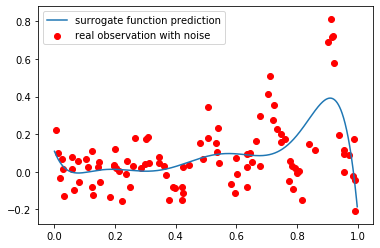

>x=0.907, f()=0.391263, actual=0.693
>x=0.891, f()=0.407596, actual=0.893
>x=0.910, f()=0.460467, actual=0.668
>x=0.911, f()=0.477014, actual=0.744
>x=0.916, f()=0.494510, actual=0.632
>x=0.903, f()=0.504290, actual=0.836
>x=0.906, f()=0.527293, actual=0.735
>x=0.898, f()=0.534005, actual=0.640
>x=0.920, f()=0.539883, actual=0.570
>x=0.923, f()=0.535638, actual=0.690
>x=0.912, f()=0.555411, actual=0.614
>x=0.912, f()=0.558441, actual=0.733
>x=0.898, f()=0.559707, actual=0.781
>x=0.914, f()=0.575228, actual=0.610
>x=0.912, f()=0.577563, actual=0.751
>x=0.901, f()=0.580820, actual=0.858
>x=0.906, f()=0.595384, actual=0.881
>x=0.907, f()=0.606543, actual=0.756
>x=0.907, f()=0.611991, actual=0.840
>x=0.897, f()=0.610832, actual=0.864
>x=0.907, f()=0.628421, actual=0.760
>x=0.906, f()=0.632353, actual=0.891
>x=0.910, f()=0.641359, actual=0.622
>x=0.916, f()=0.637697, actual=0.550
>x=0.910, f()=0.638096, actual=0.936
>x=0.911, f()=0.646520, actual=0.640
>x=0.912, f()=0.646015, actual=0.746
>

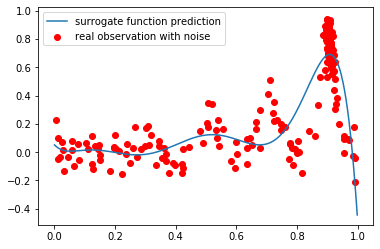

Best Result: x=0.899, y=0.941


In [17]:
def objective(x, noise=0.1):  # obj function return y
    noise = normal(loc=0, scale=noise)
    return (x**2 * sin(5 * pi * x)**6.0) + noise
 
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
    # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)
    
#probability of improvement acquisition function
def acquisition(X, Xsamples, model):
    # calculate the best surrogate score found so far
    yhat, _ = surrogate(model, X)
    best = max(yhat)
    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, Xsamples)
    mu = mu[:, 0]
    # calculate the probability of improvement
    probs = norm.cdf((mu - best) / (std+1E-9))
    return probs
 
# optimize the acquisition function
def opt_acquisition(X, y, model):
    # random search, generate random samples
    Xsamples = np.random.random(100)
    Xsamples = Xsamples.reshape(-1, 1)
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    # locate the index of the largest scores
    ix = argmax(scores)
    return Xsamples[ix, 0]

# plot real observations v.s surrogate function
def compare_plot(X,y,model):
    plt.scatter(X,y,c = "r",label = "real observation with noise")
    # surrogate samples
    s_sample = np.arange(0, 1, 0.001)
    s_sample = np.array(s_sample).reshape(-1, 1)
    s_pre, _ = surrogate(model,s_sample)
    plt.plot(s_sample,s_pre, label = "surrogate function prediction")
    plt.legend()
    plt.show() 
     
# sample the domain sparsely with noise
X = np.random.random(100)
y = np.asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
compare_plot(X, y, model)
# perform the optimization process
for i in range(100):
    # select the next point to sample
    x = opt_acquisition(X, y, model)
    # sample the point
    actual = objective(x)
    # summarize the finding
    est, _ = surrogate(model, [[x]])
    print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
    # add the data to the dataset
    X = np.vstack((X, [[x]]))
    y = np.vstack((y, [[actual]]))
    # update the model
    model.fit(X, y)
    
# plot all samples and the final surrogate function
compare_plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))